In [1]:
import torchvision.datasets as datasets

# Load MNIST dataset
train_dataset = datasets.MNIST(root='data/', train=True, download=True)
test_dataset = datasets.MNIST(root='data/', train=False, download=True)

# Split dataset into test and train
train_images = train_dataset.data
train_labels = train_dataset.targets
test_images = test_dataset.data
test_labels = test_dataset.targets

# Print shape of the datasets
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

Train Images Shape: torch.Size([60000, 28, 28])
Train Labels Shape: torch.Size([60000])
Test Images Shape: torch.Size([10000, 28, 28])
Test Labels Shape: torch.Size([10000])


In [2]:
!pip install torch

In [3]:
!pip install tensorflow
import tensorflow as tf

In [4]:
train_images = tf.convert_to_tensor(train_images.numpy(), dtype=tf.float32)
train_labels = tf.convert_to_tensor(train_labels.numpy(), dtype=tf.int32)

# Equal division of data

In [5]:
# Split it into groups of 4 because 60000 divvides evenly among 4 groups
split_images = tf.split(train_images, 4, axis=0)
split_labels = tf.split(train_labels, 4, axis=0)

In [6]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Group 1 - Images: (15000, 28, 28), Labels: (15000,)


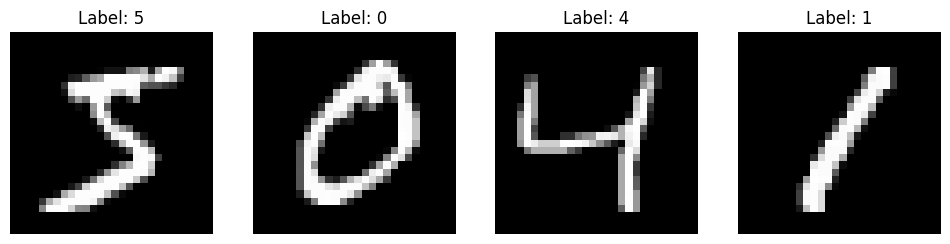

Group 2 - Images: (15000, 28, 28), Labels: (15000,)


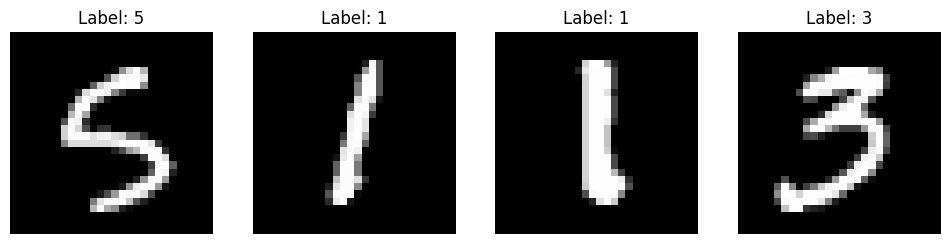

Group 3 - Images: (15000, 28, 28), Labels: (15000,)


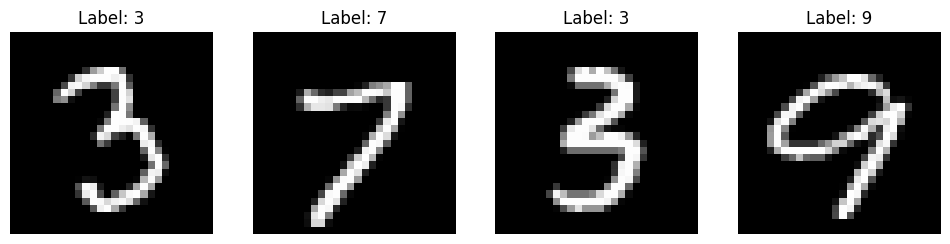

Group 4 - Images: (15000, 28, 28), Labels: (15000,)


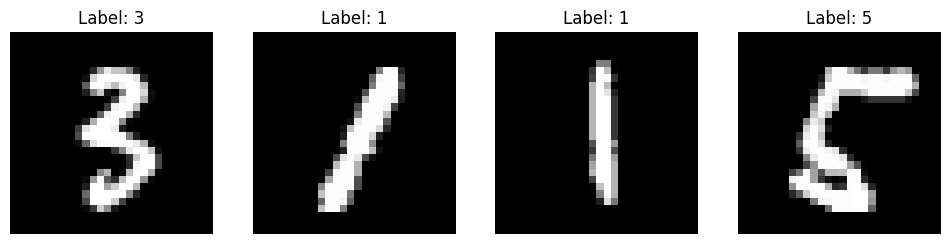

In [7]:
for i in range(len(split_images)):
    print(f"Group {i+1} - Images: {split_images[i].shape}, Labels: {split_labels[i].shape}")
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))
    for j in range(4):
        img = split_images[i][j]
        label = split_labels[i][j]
        axs[j].imshow(img, cmap='gray')
        axs[j].set_title(f"Label: {label}")
        axs[j].axis('off')
    plt.show()

In [8]:
# our model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
import numpy as np

## Random Seeding

In [10]:
trained_models = []
for i in range(len(split_images)):
    print(f"Training model for Group {i+1}")
    seed = np.random.randint(0, 1000)
    tf.random.set_seed(seed)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(split_images[i], split_labels[i], epochs=5, batch_size=32, verbose=1)
    trained_models.append(model)

Training model for Group 1
Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 7.7381 - accuracy: 0.8228
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 1.2273 - accuracy: 0.9033
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5967 - accuracy: 0.9211
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3801 - accuracy: 0.9383
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2408 - accuracy: 0.9524
Training model for Group 2
Epoch 1/5
469/469 [==============================] - 6s 8ms/step - loss: 0.7315 - accuracy: 0.8850
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3746 - accuracy: 0.9131
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2842 - accuracy: 0.9338
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2291 - accuracy: 0.9406
Epoch 5/5
469/469 [==============================] - 

In [11]:
averaged_weights = []
for layer_weights in zip(*[model.get_weights() for model in trained_models]):
    averaged_weights.append(np.mean(layer_weights, axis=0))

In [12]:
model.set_weights(averaged_weights)

In [13]:
test_images = tf.convert_to_tensor(test_images.numpy(), dtype=tf.float32)
test_labels = tf.convert_to_tensor(test_labels.numpy(), dtype=tf.int32)

In [14]:
print("Evaluating the averaged model")
evaluation = model.evaluate(test_images, test_labels, verbose=1)
print(f"Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")

Evaluating the averaged model
313/313 [==============================] - 1s 3ms/step - loss: 0.4302 - accuracy: 0.9316
Loss: 0.4301724135875702, Accuracy: 0.9315999746322632


## Shared Seeding


In [15]:
seed = np.random.randint(0, 1000)
tf.random.set_seed(seed)

In [16]:
trained_models = []
for i in range(len(split_images)):
    print(f"Training model for Group {i+1}")
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(split_images[i], split_labels[i], epochs=5, batch_size=32, verbose=1)
    trained_models.append(model)

Training model for Group 1
Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.3755 - accuracy: 0.9360
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2476 - accuracy: 0.9479
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2073 - accuracy: 0.9534
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1830 - accuracy: 0.9565
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1599 - accuracy: 0.9582
Training model for Group 2
Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.3318 - accuracy: 0.9416
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2310 - accuracy: 0.9494
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1771 - accuracy: 0.9575
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1556 - accuracy: 0.9591
Epoch 5/5
469/469 [==============================] - 2s

In [17]:
averaged_weights = []
for layer_weights in zip(*[model.get_weights() for model in trained_models]):
    averaged_weights.append(np.mean(layer_weights, axis=0))

In [18]:
model.set_weights(averaged_weights)

In [19]:
print("Evaluating the averaged model")
evaluation = model.evaluate(test_images, test_labels, verbose=1)
print(f"Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")

Evaluating the averaged model
313/313 [==============================] - 1s 2ms/step - loss: 0.4066 - accuracy: 0.9456
Loss: 0.4066128730773926, Accuracy: 0.9455999732017517


# Unequal Division of Data

In [20]:
increments = [5000, 10000, 15000, 20000]
split_images = []
split_labels = []
for i, increment in enumerate(increments):
    if i == 0:
        split_images.append(train_images[:increment])
        split_labels.append(train_labels[:increment])
    else:
        split_images.append(tf.concat([split_images[i-1], train_images[increments[i-1]:increment]], axis=0))
        split_labels.append(tf.concat([split_labels[i-1], train_labels[increments[i-1]:increment]], axis=0))

In [21]:
for i in range(len(split_images)):
    print(f"Group {i+1} - Images: {split_images[i].shape}, Labels: {split_labels[i].shape}")

Group 1 - Images: (5000, 28, 28), Labels: (5000,)
Group 2 - Images: (10000, 28, 28), Labels: (10000,)
Group 3 - Images: (15000, 28, 28), Labels: (15000,)
Group 4 - Images: (20000, 28, 28), Labels: (20000,)


## Random Seeding

In [22]:
import tensorflow as tf
import numpy as np
trained_models = []
for i in range(len(split_images)):
    print(f"Training model for Group {i+1}")
    seed = np.random.randint(0, 1000)
    tf.random.set_seed(seed)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(split_images[i], split_labels[i], epochs=5, batch_size=32, verbose=1)
    trained_models.append(model)

Training model for Group 1
Epoch 1/5
157/157 [==============================] - 1s 4ms/step - loss: 0.3570 - accuracy: 0.9488
Epoch 2/5
157/157 [==============================] - 1s 4ms/step - loss: 0.1812 - accuracy: 0.9622
Epoch 3/5
157/157 [==============================] - 1s 5ms/step - loss: 0.1292 - accuracy: 0.9682
Epoch 4/5
157/157 [==============================] - 1s 4ms/step - loss: 0.1185 - accuracy: 0.9708
Epoch 5/5
157/157 [==============================] - 1s 4ms/step - loss: 0.1148 - accuracy: 0.9720
Training model for Group 2
Epoch 1/5
313/313 [==============================] - 3s 6ms/step - loss: 0.3067 - accuracy: 0.9560
Epoch 2/5
313/313 [==============================] - 2s 6ms/step - loss: 0.1669 - accuracy: 0.9622
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 0.1233 - accuracy: 0.9693
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.1070 - accuracy: 0.9709
Epoch 5/5
313/313 [==============================] - 1s

In [23]:
averaged_weights = []
for layer_weights in zip(*[model.get_weights() for model in trained_models]):
    averaged_weights.append(np.mean(layer_weights, axis=0))

In [24]:
model.set_weights(averaged_weights)

In [25]:
print("Evaluating the averaged model")
evaluation = model.evaluate(test_images, test_labels, verbose=1)
print(f"Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")

Evaluating the averaged model
313/313 [==============================] - 1s 2ms/step - loss: 0.6109 - accuracy: 0.9471
Loss: 0.6109396815299988, Accuracy: 0.9470999836921692


## Shared Seeding

In [26]:
seed = np.random.randint(0, 1000)
tf.random.set_seed(seed)

In [27]:
trained_models = []
for i in range(len(split_images)):
    print(f"Training model for Group {i+1}")
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(split_images[i], split_labels[i], epochs=5, batch_size=32, verbose=1)
    trained_models.append(model)

Training model for Group 1
Epoch 1/5
157/157 [==============================] - 1s 5ms/step - loss: 0.1375 - accuracy: 0.9776
Epoch 2/5
157/157 [==============================] - 1s 4ms/step - loss: 0.0932 - accuracy: 0.9816
Epoch 3/5
157/157 [==============================] - 1s 4ms/step - loss: 0.0639 - accuracy: 0.9842
Epoch 4/5
157/157 [==============================] - 1s 4ms/step - loss: 0.0708 - accuracy: 0.9846
Epoch 5/5
157/157 [==============================] - 1s 4ms/step - loss: 0.0754 - accuracy: 0.9832
Training model for Group 2
Epoch 1/5
313/313 [==============================] - 3s 7ms/step - loss: 0.1429 - accuracy: 0.9764
Epoch 2/5
313/313 [==============================] - 1s 5ms/step - loss: 0.1460 - accuracy: 0.9759
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0713 - accuracy: 0.9828
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0707 - accuracy: 0.9837
Epoch 5/5
313/313 [==============================] - 1s

In [28]:
averaged_weights = []
for layer_weights in zip(*[model.get_weights() for model in trained_models]):
    averaged_weights.append(np.mean(layer_weights, axis=0))

In [29]:
model.set_weights(averaged_weights)

In [30]:
print("Evaluating the averaged model")
evaluation = model.evaluate(test_images, test_labels, verbose=1)
print(f"Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")

Evaluating the averaged model
313/313 [==============================] - 1s 2ms/step - loss: 0.9034 - accuracy: 0.9503
Loss: 0.9033692479133606, Accuracy: 0.9502999782562256
